In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
# load model
module = hub.load("https://tfhub.dev/intel/midas/v2_1_small/1", tags=['serve'])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [3]:
from utils.eval import *

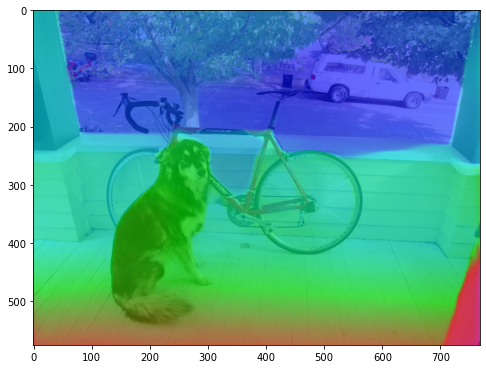

In [4]:
pltPredOnImg(module, 'images/dog.jpg')